# Exploratory Data Analysis (EDA) – Cleaned Telco Customer Churn (Kaggle, CC0 License)
This notebook performs Exploratory Data Analysis (EDA) on the **Cleaned Telco Customer Churn** dataset.

**Objective:**  
To analyze a real-world customer churn dataset to discover key insights about
customer retention.

**Dataset Used:**  
`cleaned_telco_customer_churn.csv` (Cleaned Telco Customer Churn dataset from previous notebook 1_data_cleaning_telco_churn.ipynb)

## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-telco-customer-churn-dataset/cleaned_telco_customer_churn.csv


## Load Dataset

In [32]:
df = pd.read_csv('/kaggle/input/cleaned-telco-customer-churn-dataset/cleaned_telco_customer_churn.csv')

## Dataset Overview
Let's examine the basic structure and information of our dataset.

In [8]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36 months
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 months
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months


- `df.head()` gives top rows to examine basic data.  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- `df.info()` helps identify data types and missing values.  

In [10]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


- `df.describe()` gives summary statistics for numerical columns. 

In [ ]:
## Missing and Duplicate Values

In [11]:
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
TenureGroup         11
dtype: int64

In [12]:
df.duplicated().sum()

0

Confirmed that there are no missing / duplicate value.

## Univariate Analysis – Distribution of churn, gender, tenure.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Churn', ylabel='Count'>

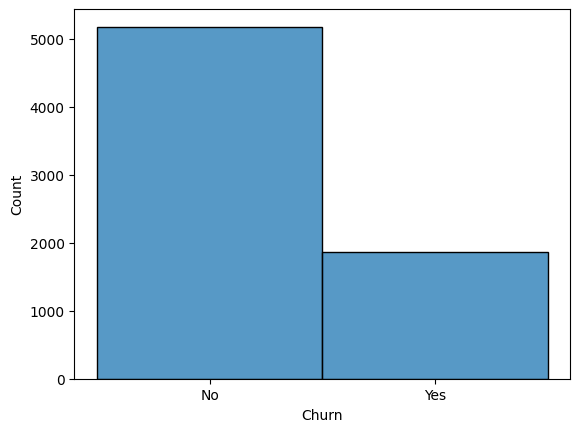

In [7]:
# Histogram 
sns.histplot(df['Churn'])

In [26]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

*Observation: The churning rate is 26.53%.*

**Histogram for evaluating the number of Customer as per Gender**

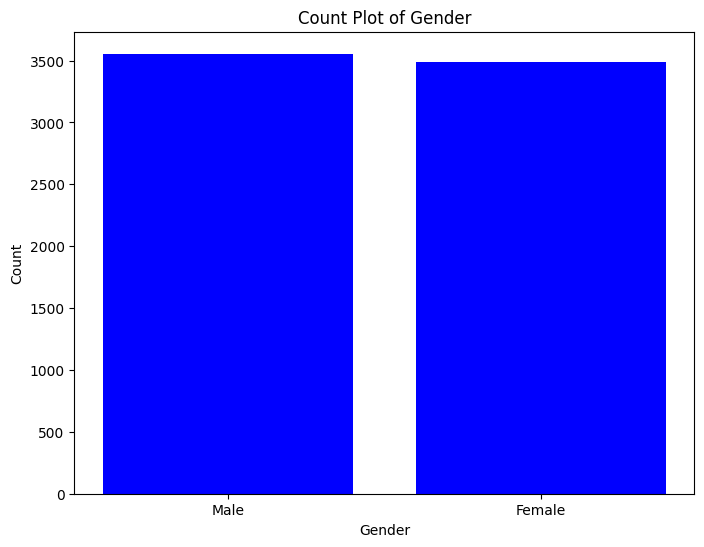

In [45]:
# Histogram 
sns.histplot(df['Gender'])

In [29]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

*Observation: Male customers are slighyly higher (~1%) than Female customers.*

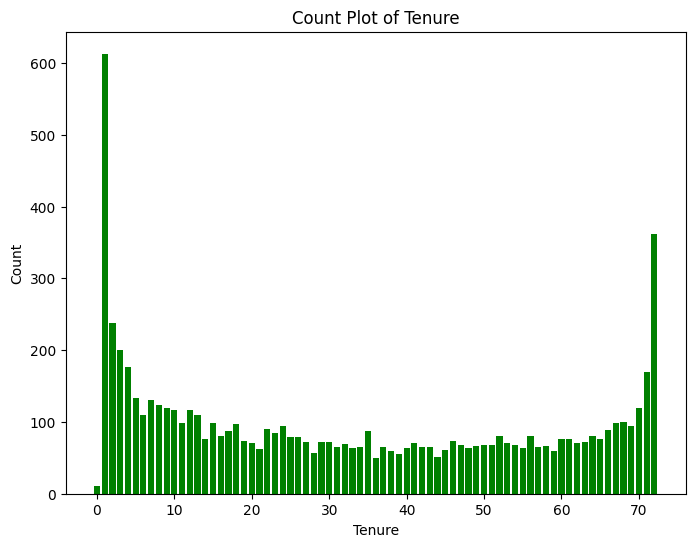

In [13]:
#tenure_counts = df['Tenure'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(df['Tenure'].value_counts().index, df['Tenure'].value_counts(), color='green')
plt.title('Count Plot of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

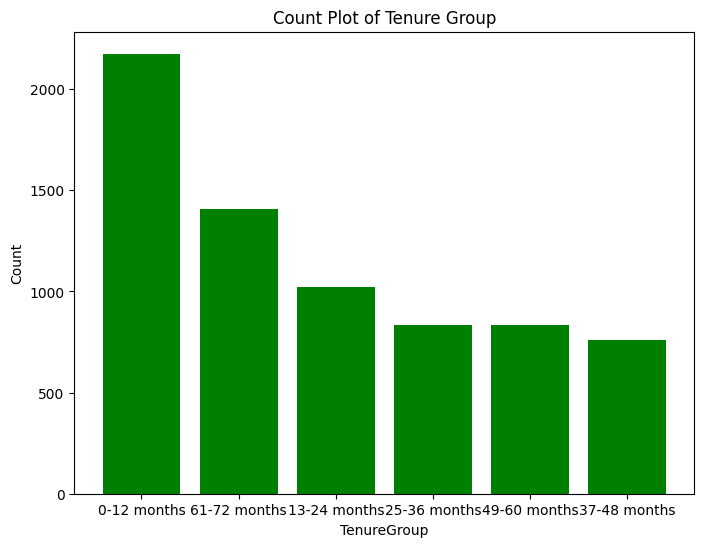

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(df['TenureGroup'].value_counts().index, df['TenureGroup'].value_counts(), color='green')
plt.title('Count Plot of Tenure Group')
plt.xlabel('TenureGroup')
plt.ylabel('Count')
plt.show()

Observation:
- Highest number of customers are for (0-12 months) - 1 Month tenure
- 2nd highest number of customers are for (61-72 months) - 72 Months tenure

## Bivariate Analysis – Churn vs. Contract type, Payment method

**Evaluating relationship between Churn and Contract type**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Histogram of Churn, by Contract Type')

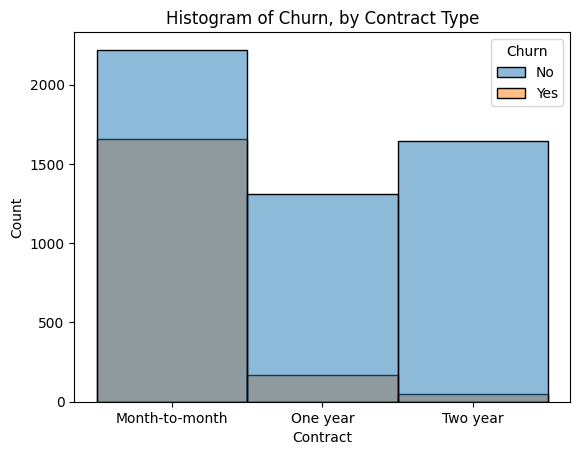

In [18]:
# Histograms for Contract Type with Churn
sns.histplot(data=df, x='Contract', hue='Churn')

# Add title
plt.title("Histogram of Churn, by Contract Type")

- We have used Histogram for evaluating relationship of Churn with Contract Type. 


*Observation: - There is very high churning for contract type 'Month-to-month'.- In comparison to Month-to-month contract 'One year Contract' and 'Two year' contract there the churing is low.*


**Evaluating relationship between Churn and Payment Method**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Histogram of Churn, by Payment Method')

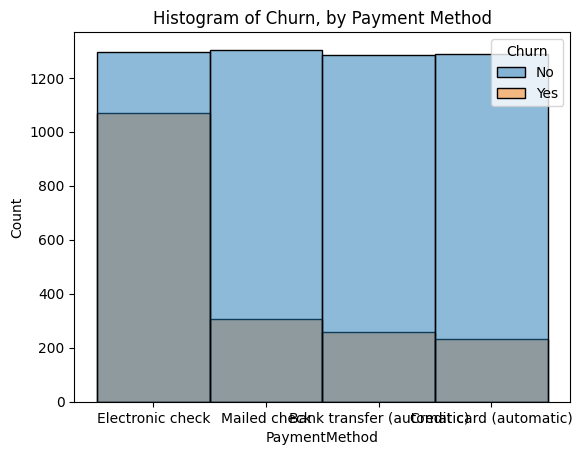

In [24]:
# Histograms for Payment Method with Churn
sns.histplot(data=df, x='PaymentMethod', hue='Churn')

# Add title
plt.title("Histogram of Churn, by Payment Method")


- We have used Histogram for evaluating relationship of Churn with Payment Method. 

Observation: There is very high churning for 'Electronic check' payment method.

## Correlation heatmap for numeric columns

<Axes: >

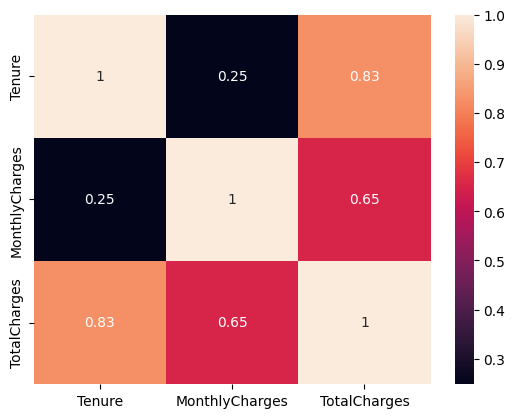

In [29]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Used sns.heatmap and corr for generating correlation heatmap.

## Identify top 3 churn risk patterns.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()
df_model = df_model.dropna()
df_model['Churn'] = LabelEncoder().fit_transform(df_model['Churn'])

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']
X = pd.get_dummies(X, drop_first=True)

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(10)


TotalCharges                      0.093501
Tenure                            0.090949
MonthlyCharges                    0.083650
InternetService_Fiber optic       0.035002
PaymentMethod_Electronic check    0.026040
Contract_Two year                 0.022119
PaperlessBilling_Yes              0.018926
TechSupport_Yes                   0.018787
InternetService_No                0.018709
OnlineSecurity_Yes                0.016824
dtype: float64

- Above code helped in finding top 3 risk for high churn

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Histogram of Churn, by TotalCharges')

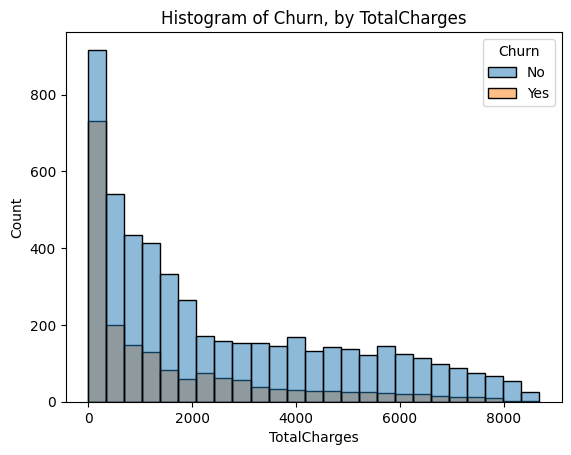

In [39]:
# Histograms for TotalCharges with Churn
sns.histplot(data=df, x='TotalCharges', hue='Churn')

# Add title
plt.title("Histogram of Churn, by TotalCharges")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Histogram of Churn, by Tenure')

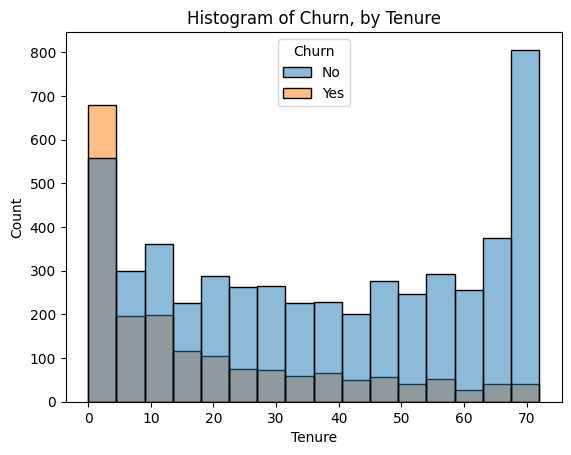

In [42]:
# Histograms for Tenure with Churn
sns.histplot(data=df, x='Tenure', hue='Churn')

# Add title
plt.title("Histogram of Churn, by Tenure")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Histogram of Churn, by MonthlyCharges')

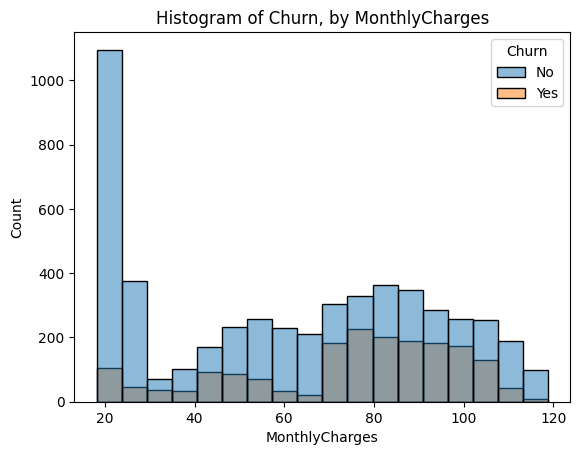

In [43]:
# Histograms for MonthlyCharges with Churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn')

# Add title
plt.title("Histogram of Churn, by MonthlyCharges")

Observation: There are high risk of churn for customer with short tenure and low total charges